In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
# Parameters of the trade-off function
be = 0.4  # Singular strategy
al_be = 0.02  # alpha(beta*)
dal_be = 0.025  # alpha'(beta*)
ddal_be = 0.03  # alpha''(beta*)

In [3]:
# Default values of parameters for the dynamics of the resident strain
beta10 = 0.75  # Transmission rate of the resident strain
rho0 = 0.012
mu0 = 0.012
sigma_S0 = 1  # vulnerability to infection
sigma_I0 = 2  # vulnerability to a new infection

In [4]:
def fitnessgrad(betam, 
                mu = mu0, 
                sigma_S = sigma_S0, 
                sigma_I = sigma_I0, 
                S = 0, I1 = 0, D11 = 0):
    
    lambdam=(betam*(I1+D11))
    alpham = al_be - (dal_be**2/ddal_be)*(1 - np.exp(ddal_be*(betam - be)/dal_be))
    alphamd = dal_be*np.exp(ddal_be*(betam - be)/dal_be)
    dr = sigma_S*S*(((mu+alpham+(sigma_I*lambdam)-(betam*alphamd))/(mu+alpham+(sigma_I*lambdam))**2)+(((sigma_I*lambdam)/(mu+alpham+(sigma_I*lambdam)))*(((mu+alpham-(betam*alphamd))/(mu+alpham)**2)-(((betam*alphamd)/(mu+alpham))/(mu+alpham+(sigma_I*lambdam)))))) + sigma_I*I1*((mu+alpham-(betam*alphamd))/(mu+alpham)**2)
    return dr 

In [5]:
# Dynamics of the resident strain
def dy_resident(x, t, 
                beta1 = beta10, 
                rho = rho0,
                mu = mu0, 
                sigma_S = sigma_S0, 
                sigma_I = sigma_I0):
    
    alpha_1 = al_be - dal_be**2/ddal_be*(1 - np.exp(ddal_be*(beta1 - be)/dal_be))
    alpha_11 = alpha_1
    lambda_1 = beta1 * ( x[1] + x[2] )
    dSdt = rho - mu * x[0] - sigma_S * lambda_1 * x[0]
    dIdt = sigma_S * lambda_1 * x[0] - (mu + alpha_1 + sigma_I * lambda_1) * x[1]
    dDdt = sigma_I * lambda_1 * x[1] - (mu + alpha_11) * x[2]
    return dSdt, dIdt, dDdt

In [6]:
def singular_strategy(beta1 = beta10,
                      rho = rho0,
                      mu = mu0, 
                      sigma_S = sigma_S0, 
                      sigma_I = sigma_I0):
    
    # Time points
    tmax = 2000
    ts = np.linspace(0, 200, tmax)
    
    # Initial conditions x0 = [S0, I0, D0]
    x0 = [0.4, 0.1, 0.05]
    
    # Solve the population dynamics
    xs = odeint(dy_resident, x0, ts, args = (beta1, rho, mu, sigma_S, sigma_I))
    
    # Find the equilibrium
    Se = xs[:, 0][tmax - 1]
    I1e = xs[:, 1][tmax - 1]
    D11e = xs[:, 2][tmax - 1]
    
    fitness = []
    
    betams = np.linspace(0,2,10000)
    
    for i in list(betams):
        fitness.append(fitnessgrad(i, mu = mu, sigma_S = sigma_S, sigma_I = sigma_I, S = Se, I1 = I1e, D11 = D11e))
        
    if (any(map(lambda x: x > 0, fitness)) & any(map(lambda x: x < 0, fitness))):
        for j in range(len(fitness)-1):
            if fitness[j] * fitness[j+1] < 0:
                s = 0.5 * (betams[j] + betams[j+1])
            else:
                j = j + 1
    
    return s

In [7]:
singular_strategy()

1.0404040404040404

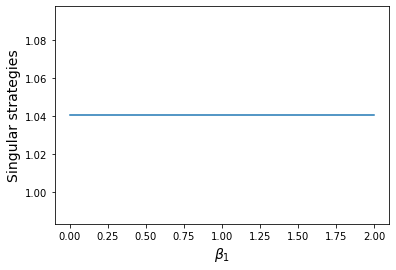

In [8]:
# Beta1
beta1s = np.linspace(0,2,200)
singular_strategies1 = []
for k in list(beta1s):
    singular_strategies1.append(singular_strategy(beta1 = k))
plt.plot(beta1s, singular_strategies1)
plt.xlabel('$\\beta_1$', fontsize=14)
plt.ylabel('Singular strategies', fontsize=14)
plt.show()

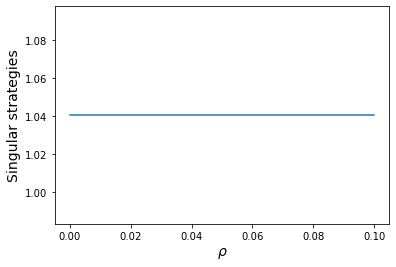

In [9]:
# rho
rhos = np.linspace(0,0.1,200)
singular_strategies2 = []
for k in list(rhos):
    singular_strategies2.append(singular_strategy(rho = k))
plt.plot(rhos, singular_strategies2)
plt.xlabel('$\\rho$', fontsize=14)
plt.ylabel('Singular strategies', fontsize=14)
plt.show()

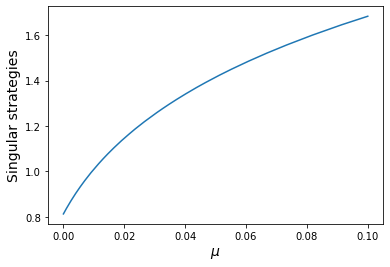

In [10]:
# mu
mus = np.linspace(0,0.1,200)
singular_strategies3 = []
for k in list(mus):
    singular_strategies3.append(singular_strategy(mu = k))
plt.plot(mus, singular_strategies3)
plt.xlabel('$\\mu$', fontsize=14)
plt.ylabel('Singular strategies', fontsize=14)
plt.show()

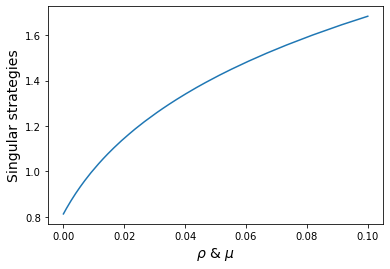

In [11]:
# rho and mu
r_ms = np.linspace(0,0.1,200)
singular_strategies4 = []
for k in list(r_ms):
    singular_strategies4.append(singular_strategy(rho = k, mu = k))
plt.plot(r_ms, singular_strategies4)
plt.xlabel('$\\rho\ &\ \\mu$', fontsize=14)
plt.ylabel('Singular strategies', fontsize=14)
plt.show()

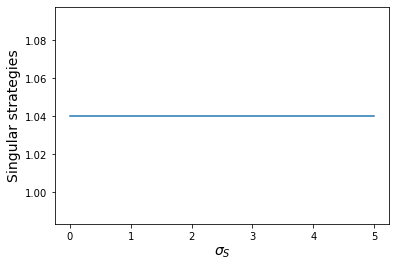

In [12]:
# sigma_S
sigma_Ss = np.linspace(0,5,500)
singular_strategies5 = []
for k in list(sigma_Ss):
    singular_strategies5.append(singular_strategy(sigma_S = k))
plt.plot(sigma_Ss, singular_strategies5)
plt.xlabel('$\\sigma_S$', fontsize=14)
plt.ylabel('Singular strategies', fontsize=14)
plt.show()

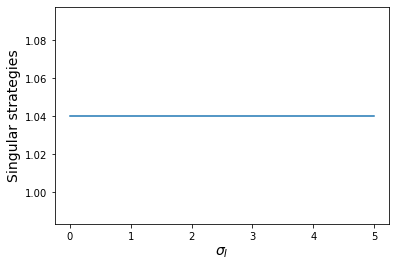

In [13]:
# sigma_I
sigma_Is = np.linspace(0,5,500)
singular_strategies6 = []
for k in list(sigma_Is):
    singular_strategies6.append(singular_strategy(sigma_I = k))
plt.plot(sigma_Is, singular_strategies6)
plt.xlabel('$\\sigma_I$', fontsize=14)
plt.ylabel('Singular strategies', fontsize=14)
plt.show()